In [21]:
import pandas as pd
import numpy as np

In [65]:
job_posting = pd.read_csv("./linkedin_scraped_kaggle/linkedin_job_postings.csv")
job_summary = pd.read_csv("./linkedin_scraped_kaggle/job_summary.csv")
job_skills = pd.read_csv("./linkedin_scraped_kaggle/job_skills.csv")

In [70]:
job_posting

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite


In [71]:
merged_job_df = job_posting.merge(job_summary, on='job_link', how='inner').merge(job_skills, on='job_link', how='inner')

In [4]:
merged_job_df.to_csv("/Users/taclin/Desktop/all_jobs.csv")

In [5]:
merged_job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1296381 non-null  object
 1   last_processed_time  1296381 non-null  object
 2   got_summary          1296381 non-null  object
 3   got_ner              1296381 non-null  object
 4   is_being_worked      1296381 non-null  object
 5   job_title            1296381 non-null  object
 6   company              1296372 non-null  object
 7   job_location         1296362 non-null  object
 8   first_seen           1296381 non-null  object
 9   search_city          1296381 non-null  object
 10  search_country       1296381 non-null  object
 11  search_position      1296381 non-null  object
 12  job_level            1296381 non-null  object
 13  job_type             1296381 non-null  object
 14  job_summary          1296381 non-null  object
 15  job_skills     

In [22]:
import pandas as pd
import re

# Define the keywords to filter
keywords = [
    # General AI and Machine Learning
    "AI", "Artificial Intelligence", "Machine Learning", "ML",
    "Deep Learning", "DL", "Large Language Models", "LLM",
    "Reinforcement Learning", "Supervised Learning", "Unsupervised Learning",
    "Semi-Supervised Learning", "Transfer Learning", "Natural Language Processing", "NLP",

    # Machine Learning Models
    "Regression", "Linear Regression", "Logistic Regression", "Decision Trees", 
    "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost",
    "SVM", "Support Vector Machines", "KNN", "K-Nearest Neighbors",
    "Neural Networks", "Convolutional Neural Networks", "CNN",
    "Recurrent Neural Networks", "RNN", "LSTM", "Long Short-Term Memory", 
    "GRU", "Gated Recurrent Units", "Autoencoders", "Variational Autoencoders",
    "GAN", "Generative Adversarial Networks",

    # Statistics and Linear Algebra
    "Linear Algebra", "Eigenvalues", "Eigenvectors", "Matrix Multiplication", "SVD", 
    "Singular Value Decomposition", "PCA", "Principal Component Analysis",
    "Variance", "Standard Deviation", "Probability", 
    "Bayesian", "Markov Chains", "Monte Carlo", "Hypothesis Testing",

    # Calculus and Optimization
    "Gradient Descent", "Backpropagation", "Partial Derivatives", "Optimization", 
    "Stochastic Gradient Descent", "Newton's Method", "Convex Optimization",

    # Cloud and Automation
    "Automation"

    # Additional Machine Learning Concepts
    "Clustering", "K-Means", "DBSCAN", "Mean Shift", "Agglomerative Clustering",
    "Gaussian Mixture Models", "Anomaly Detection", "Time Series Analysis",
    "ARIMA", "SARIMA", "Exponential Smoothing"
]

# Compile a regex pattern for matching the keywords
keywords_pattern = re.compile(r"\b(" + "|".join(re.escape(kw) for kw in keywords) + r")\b", flags=re.IGNORECASE)

# Function to extract skills from job_summary
def extract_skills(summary):
    if pd.isnull(summary):  # Handle missing summaries
        return []
    matches = keywords_pattern.findall(summary)
    return list(set(matches))  # Return unique matches as a list

In [ ]:
# Load the data (adjust the path to your dataset)
file_path = "/Users/taclin/Desktop/all_jobs.csv"
data = pd.read_csv(file_path)

# Apply the function to create the new column
data['required_ds_skills'] = data['job_summary'].apply(extract_skills)

# Save the processed data to a new file
output_path = "/Users/taclin/Desktop/human_context_final_project/filtered_jobs_with_skills_extended.csv"
data.to_csv(output_path, index=False)

print(f"Processed data saved to {output_path}")

In [6]:
processed_job_df = pd.read_csv("/Users/taclin/Desktop/human_context_final_project/filtered_jobs_with_skills_extended.csv")

In [7]:
processed_job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Unnamed: 0           1296381 non-null  int64 
 1   job_link             1296381 non-null  object
 2   last_processed_time  1296381 non-null  object
 3   got_summary          1296381 non-null  object
 4   got_ner              1296381 non-null  object
 5   is_being_worked      1296381 non-null  object
 6   job_title            1296381 non-null  object
 7   company              1296372 non-null  object
 8   job_location         1296362 non-null  object
 9   first_seen           1296381 non-null  object
 10  search_city          1296381 non-null  object
 11  search_country       1296381 non-null  object
 12  search_position      1296381 non-null  object
 13  job_level            1296381 non-null  object
 14  job_type             1296381 non-null  object
 15  job_summary    

In [8]:
processed_job_df

,Unnamed: 0,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_summary,job_skills,required_ds_skills
0,0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,Responsibilities\nJob Description Summary\nJob...,"Medical equipment sales, Key competitors, Term...",[]
1,1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,Employment Type:\nFull time\nShift:\nDescripti...,"Nursing, Bachelor of Science in Nursing, Maste...",[]
2,2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,Job Details\nDescription\nWhat You'll Do\nAs a...,"Restaurant Operations Management, Inventory Ma...",[]
3,3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,Who We Are\nRand Realty is a family-owned brok...,"Real Estate, Customer Service, Sales, Negotiat...",[]
4,4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,Employment Type:\nFull time\nShift:\n12 Hour N...,"Nursing, BSN, Medical License, Virtual RN, Nur...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296376,1296376,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite,TravelNurseSource is working with Adelphi Medi...,"Registered Nurse, BLS certification, Nursing c...",[]
1296377,1296377,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite,Want to learn more about this role and Jobot? ...,"Construction management, Project planning, Est...",[]
1296378,1296378,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite,NEXDINE HOSPITALITY one of the nation's fastes...,"Culinary, Chef Director, Menu writing, Cycle o...",[]
1296379,1296379,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite,TravelNurseSource is working with Alliant Pers...,"Registered Nurse, Analyst, RN Registered Nurse...",[]


In [23]:
import ast 
processed_job_df['required_ds_skills'] = processed_job_df['required_ds_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

NameError: name 'processed_job_df' is not defined

In [17]:
related_job_df=processed_job_df[
    processed_job_df['required_ds_skills'].apply(lambda x: len(x) > 0)
]

In [22]:
related_job_df.size/processed_job_df.size

0.09933268074740373

In [23]:
related_job_df

,Unnamed: 0,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_summary,job_skills,required_ds_skills
11,11,https://www.linkedin.com/jobs/view/control-sys...,2024-01-21 08:08:24.021822+00,t,t,f,Control Systems Integration Engineer,Olsson,"Lincoln, NE",2024-01-14,Nebraska,United States,Solutions Operator,Associate,Onsite,"Company Description\nWe are Olsson, a team-bas...","Control Systems Integration, PLC Programming, ...","[automation, Automation]"
35,35,https://www.linkedin.com/jobs/view/asset-wealt...,2024-01-21 07:12:35.384792+00,t,t,f,Asset Wealth Management – Regulated Investment...,PwC,"Sacramento, CA",2024-01-14,Davis,United States,Manager Records Analysis,Mid senior,Onsite,Specialty/Competency:\nIndustry Tax Practice\n...,"Tax, CPA, Form 1120RIC, RICs, Shareholder repo...",[automation]
37,37,https://www.linkedin.com/jobs/view/sr-experien...,2024-01-21 07:12:36.069828+00,t,t,f,"Sr Experience Design Manager, Learn and Help",Adobe,"New York, NY",2024-01-15,Bayonne,United States,Cost-And-Sales-Record Supervisor,Mid senior,Onsite,Our Company\nChanging the world through digita...,"Adobe Experience Cloud, Adobe Creative Cloud, ...",[Cloud]
86,86,https://www.linkedin.com/jobs/view/optical-eng...,2024-01-21 07:43:50.134579+00,t,t,f,Optical Engineers IV,STS Technical Services,"San Francisco, CA",2024-01-14,Richmond,United States,Electrical Engineer,Mid senior,Onsite,STS Technical Services is hiring\nOptical Engi...,"Optical design, Zemax, FRED, Optical subassemb...",[optimization]
89,89,https://www.linkedin.com/jobs/view/senior-netw...,2024-01-21 07:43:52.794572+00,t,t,f,Senior Network Engineering Lead - Remote,"Ryder System, Inc.","Richmond, VA",2024-01-16,Montpelier,United States,Frame Hand,Mid senior,Onsite,Job Seekers can review the Job Applicant Priva...,"Network Engineering, Cloud Computing, Azure, A...","[AWS, Amazon Web Services, Azure, cloud, Cloud]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296355,1296355,https://www.linkedin.com/jobs/view/senior-mana...,2024-01-20 13:46:08.768333+00,t,t,f,"Senior Manager, Paid Social",Netspend,"Austin, TX",2024-01-15,Austin,United States,Director Media Marketing,Mid senior,Onsite,Senior Manager - Paid Social\nOuro is a global...,"Social Media Management, Paid Advertising, Per...","[optimization, Optimization]"
1296361,1296361,https://ca.linkedin.com/jobs/view/assistant-di...,2024-01-21 07:39:59.363341+00,t,t,f,"Assistant Director, IT Modern Workplace Soluti...",BCJobs,"Victoria, British Columbia, Canada",2024-01-14,Esquimalt,Canada,Director Education,Mid senior,Onsite,The Assistant Director leads technical aspects...,"SaaS, COTS, Custom software, Microsoft 365, Po...","[cloud, Cloud, DevOps, AI]"
1296363,1296363,https://ca.linkedin.com/jobs/view/team-lead-ap...,2024-01-20 15:20:31.041227+00,t,t,f,"Team lead, Application Development",Stantec,"Winnipeg, Manitoba, Canada",2024-01-14,Manitoba,Canada,Architect,Mid senior,Onsite,"Team lead, Application Development - ( 2400000...","Supervision, Team Leadership, Oracle ERP syste...",[Cloud]
1296371,1296371,https://uk.linkedin.com/jobs/view/social-media...,2024-01-20 15:20:49.415128+00,t,t,f,Social Media Content Executive,Citation,"Manchester, England, United Kingdom",2024-01-14,Warrington,United Kingdom,Stand-In,Mid senior,Onsite,Location:\nRemote (because we know you can cre...,"Social media marketing, Content creation, Comm...",[AI]


In [29]:
processed_job_df['last_processed_time']

'2024-01-21 17:37:21.080491+00'

In [24]:
new_job_data=pd.read_csv("./csv_files(50k)/job_postings.csv")

In [25]:
new_job_data['description']

# Apply the function to create the new column
new_job_data['required_ds_skills'] = new_job_data['description'].apply(extract_skills)

In [26]:
new_job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49775 entries, 0 to 49774
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      49775 non-null  int64  
 1   company_id                  48896 non-null  float64
 2   title                       49775 non-null  object 
 3   description                 49774 non-null  object 
 4   max_salary                  14291 non-null  float64
 5   med_salary                  4092 non-null   float64
 6   min_salary                  14291 non-null  float64
 7   pay_period                  18383 non-null  object 
 8   formatted_work_type         49775 non-null  object 
 9   location                    49775 non-null  object 
 10  applies                     8047 non-null   float64
 11  original_listed_time        49775 non-null  float64
 12  remote_allowed              6855 non-null   float64
 13  views                       180

In [27]:
new_job_data.describe()

,job_id,company_id,max_salary,med_salary,min_salary,applies,original_listed_time,remote_allowed,views,expiry,closed_time,listed_time,sponsored,scraped
count,4.977500e+04,4.889600e+04,1.429100e+04,4092.000000,14291.000000,8047.000000,4.977500e+04,6855.0,18046.000000,4.977500e+04,6.850000e+02,4.977500e+04,49775.0,4.977500e+04
mean,4.086610e+09,2.235217e+07,8.520162e+04,32348.299704,52776.448613,12.423139,1.732969e+12,1.0,29.692009,1.735965e+12,1.732967e+12,1.732983e+12,0.0,1.733002e+09
std,3.570066e+07,3.480604e+07,1.118375e+05,71515.253999,62870.315570,35.583566,2.370501e+08,0.0,99.799703,2.354199e+09,3.032925e+07,7.937737e+07,0.0,7.274886e+04
min,1.055151e+08,1.001000e+03,5.250000e+00,0.000000,1.000000,1.000000,1.716854e+12,1.0,1.000000,1.733106e+12,1.732858e+12,1.732829e+12,0.0,1.732833e+09
25%,4.086267e+09,7.447700e+04,3.200000e+01,17.482500,20.500000,1.000000,1.732910e+12,1.0,1.000000,1.735499e+12,1.732942e+12,1.732913e+12,0.0,1.732987e+09
50%,4.087711e+09,1.963255e+06,6.500000e+04,23.000000,48510.170000,3.000000,1.732981e+12,1.0,4.000000,1.735575e+12,1.732975e+12,1.732985e+12,0.0,1.733009e+09
75%,4.088617e+09,2.717991e+07,1.300000e+05,10000.000000,90000.000000,9.000000,1.733045e+12,1.0,17.000000,1.735639e+12,1.732993e+12,1.733046e+12,0.0,1.733047e+09
max,4.089168e+09,1.058091e+08,2.500000e+06,998426.000000,800000.000000,909.000000,1.733115e+12,1.0,3120.000000,1.748667e+12,1.733112e+12,1.733115e+12,0.0,1.733115e+09


In [28]:
import ast 
new_job_data['required_ds_skills'] = new_job_data['required_ds_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
new_related_job_df=new_job_data[
    new_job_data['required_ds_skills'].apply(lambda x: len(x) > 0)
]

In [29]:
new_related_job_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,required_ds_skills
33,3888126721,77764959.0,Software Development Engineer Intern,About TrainiTraini is an AI company that devel...,NaN,NaN,NaN,NaN,Full-time,"California, United States",...,NaN,NaN,1.732987e+12,NaN,0,FULL_TIME,NaN,NaN,1732987246,[AI]
46,3979170331,10667.0,"Software Engineer, OS Frameworks - Reality Labs",Reality Labs at Meta is building products that...,208000.0,NaN,70.67,YEARLY,Full-time,"New York, NY",...,NaN,NaN,1.732875e+12,jsv3.recruitics.com,0,FULL_TIME,USD,BASE_SALARY,1732875046,"[machine learning, artificial intelligence]"
61,4009390895,102938266.0,Information Technology Recruiter (commission o...,Company Description\nThe Digitalising Ltd is a...,NaN,NaN,NaN,NaN,Full-time,United States,...,NaN,NaN,1.733050e+12,NaN,0,FULL_TIME,NaN,NaN,1733050408,[AI]
79,4030302080,104649160.0,Artificial Intelligence Engineer,Company DescriptionB2B Pipeline provides innov...,NaN,NaN,NaN,NaN,Full-time,United States,...,NaN,NaN,1.732835e+12,NaN,0,FULL_TIME,NaN,NaN,1732835094,"[Artificial Intelligence, NLP, AI, natural lan..."
151,4063745313,19186406.0,VP of Strategy and Operations,\nVP of Strategy and Operations\nCompany Overv...,NaN,NaN,NaN,NaN,Full-time,San Francisco Bay Area,...,NaN,NaN,1.733110e+12,NaN,0,FULL_TIME,NaN,NaN,1733110359,[AI]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49736,4089167291,203391.0,Sustainability Account Manager,We have a simple mission - save lives through ...,NaN,NaN,NaN,NaN,Full-time,"Baltimore, MD",...,NaN,NaN,1.733114e+12,jobs.lever.co,0,FULL_TIME,NaN,NaN,1733114598,[Optimization]
49739,4089167304,1905.0,Information Systems Security Manager (ISSM) II,Job Description:\n\nType of Requisition:\n\nRe...,153180.0,NaN,113220.00,YEARLY,Full-time,"Hanscom Air Force Base, MA",...,Mid-Senior level,NaN,1.733114e+12,gdit.wd5.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY,1733114904,"[ML, AI]"
49741,4089167354,719642.0,Senior Backend Engineer (AWS),Role Overview:As a Senior Backend Engineer at ...,NaN,NaN,NaN,NaN,Full-time,"San Jose, CA",...,Mid-Senior level,NaN,1.733115e+12,NaN,0,FULL_TIME,NaN,NaN,1733115102,[Optimization]
49743,4089167360,719642.0,Senior Backend Engineer (AWS),Role Overview:As a Senior Backend Engineer at ...,NaN,NaN,NaN,NaN,Full-time,"Seattle, WA",...,Mid-Senior level,NaN,1.733115e+12,NaN,0,FULL_TIME,NaN,NaN,1733115165,[Optimization]


In [27]:
3213/49775

0.06455047714716224

In [30]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Preprocessing function for text
def preprocess_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Apply preprocessing to the description column
new_job_data['processed_description'] = new_job_data['description'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(new_job_data['processed_description'])

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters: repetitive and non-repetitive
new_job_data['task_cluster'] = kmeans.fit_predict(tfidf_matrix)

# Map cluster labels to task types
# You may manually inspect a few descriptions from each cluster to label them as 'Repetitive' or 'Non-Repetitive'
new_job_data['task_type'] = new_job_data['task_cluster'].map({0: 'Repetitive', 1: 'Non-Repetitive'})  # Adjust mapping if needed

# Analyze the distribution of repetitive and non-repetitive tasks
task_distribution = new_job_data['task_type'].value_counts()
print(task_distribution)

# Example: View samples of repetitive tasks
print(new_job_data[new_job_data['task_type'] == 'Repetitive']['description'].head())

# Example: View samples of non-repetitive tasks
print(new_job_data[new_job_data['task_type'] == 'Non-Repetitive']['description'].head())

task_type
Repetitive        37398
Non-Repetitive    12377
Name: count, dtype: int64
0    About Sinsa:Sinsa is a Korean American wine ba...
2    Skills Facilitator Position- Part-time or Full...
3    Leadpages is a platform that makes it easy for...
4    Asphalt & Concrete Sales Estimator Job Descrip...
6    Company DescriptionWe've been in business for ...
Name: description, dtype: object
1     We are looking for a compassionate and dedicat...
5     Tao of Wellness - Fellowship Position Availabl...
17    Company Description\n Zona Physical Therapy & ...
28    Registered Dietitian - Certified Diabetes Care...
38    POSITION SUMMARY: The Audiologist will be resp...
Name: description, dtype: object


In [31]:
job_industries=pd.read_csv("./csv_files(50k)/job_industries.csv")
industries=pd.read_csv("./csv_files(50k)/industries.csv")

In [32]:
job_industries

,job_id,industry_id
0,4087545358,92
1,4087543350,4
2,4087543350,1594
3,4084702784,88
4,4085984251,14
...,...,...
57819,4086595642,28
57820,4089167358,63
57821,4086361481,4
57822,4087340148,32


In [33]:
industries

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"
...,...,...
347,3250,Retail Pharmacies
348,3251,Climate Technology Product Manufacturing
349,3252,NaN
350,3253,Alternative Fuel Vehicle Manufacturing


In [34]:
job_industy_df = industries.merge(job_industries, on='industry_id', how='inner')


In [35]:
job_industy_df

,industry_id,industry_name,job_id
0,1,Defense and Space Manufacturing,4085979755
1,1,Defense and Space Manufacturing,4087544918
2,1,Defense and Space Manufacturing,4086204156
3,1,Defense and Space Manufacturing,4087551692
4,1,Defense and Space Manufacturing,4087557084
...,...,...,...
57819,3252,NaN,4085990907
57820,3252,NaN,4086613841
57821,3252,NaN,4086636279
57822,3253,Alternative Fuel Vehicle Manufacturing,4087325880


In [36]:
new_job_data = new_job_data.merge(job_industy_df, on='job_id', how='inner')

In [37]:
new_job_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,work_type,currency,compensation_type,scraped,required_ds_skills,processed_description,task_cluster,task_type,industry_id,industry_name
0,118913195,NaN,Veterinary Assistant,We are looking for a compassionate and dedicat...,18.00,NaN,14.0,HOURLY,Full-time,"Holly Springs, NC",...,FULL_TIME,USD,BASE_SALARY,1732840881,[],we are looking for a compassionate and dedicat...,1,Non-Repetitive,16,Veterinary Services
1,303810722,NaN,Group Educator- Women's Programs - Greater Boston,Skills Facilitator Position- Part-time or Full...,NaN,40000.0,NaN,YEARLY,Contract,"Boston, MA",...,CONTRACT,USD,BASE_SALARY,1732893258,[],skills facilitator position parttime or fullti...,0,Repetitive,100,Non-profit Organizations
2,1200516065,3264767.0,Product Marketing Manager,Leadpages is a platform that makes it easy for...,NaN,NaN,NaN,NaN,Full-time,Greater Minneapolis-St. Paul Area,...,FULL_TIME,NaN,NaN,1732832580,[],leadpages is a platform that makes it easy for...,0,Repetitive,4,Software Development
3,2383834403,4021575.0,Sales Estimator,Asphalt & Concrete Sales Estimator Job Descrip...,NaN,NaN,NaN,NaN,Full-time,"Colorado, United States",...,FULL_TIME,NaN,NaN,1733000460,[],asphalt concrete sales estimator job descripti...,0,Repetitive,48,Construction
4,3313146800,2249707.0,Talent Agent,We are looking for a full-time agent or agent ...,NaN,NaN,NaN,NaN,Full-time,"Lake Mary, FL",...,FULL_TIME,NaN,NaN,1732892862,[],we are looking for a fulltime agent or agent a...,0,Repetitive,28,Entertainment Providers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57819,4089168218,719642.0,Ruby on Rails Engineer - Tech Lead,Experience Remote done Right. Over 20 years of...,NaN,NaN,NaN,NaN,Full-time,United States,...,FULL_TIME,NaN,NaN,1733114684,[],experience remote done right over 20 years of ...,0,Repetitive,96,IT Services and IT Consulting
57820,4089168232,2999687.0,"Selling and Service Assistant, Meatpacking",The Team\n\nThe Hermès Meatpacking Boutique op...,27.12,NaN,22.4,HOURLY,Full-time,"New York, NY",...,FULL_TIME,USD,BASE_SALARY,1733114839,[],the team the hermès meatpacking boutique opene...,0,Repetitive,143,Retail Luxury Goods and Jewelry
57821,4089168256,719642.0,Senior Backend Engineer (AWS),Role Overview:As a Senior Backend Engineer at ...,NaN,NaN,NaN,NaN,Full-time,"Los Angeles County, CA",...,FULL_TIME,NaN,NaN,1733115231,[Optimization],role overviewas a senior backend engineer at l...,0,Repetitive,4,Software Development
57822,4089168256,719642.0,Senior Backend Engineer (AWS),Role Overview:As a Senior Backend Engineer at ...,NaN,NaN,NaN,NaN,Full-time,"Los Angeles County, CA",...,FULL_TIME,NaN,NaN,1733115231,[Optimization],role overviewas a senior backend engineer at l...,0,Repetitive,96,IT Services and IT Consulting


In [38]:
new_job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57824 entries, 0 to 57823
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      57824 non-null  int64  
 1   company_id                  57715 non-null  float64
 2   title                       57824 non-null  object 
 3   description                 57823 non-null  object 
 4   max_salary                  18157 non-null  float64
 5   med_salary                  4556 non-null   float64
 6   min_salary                  18157 non-null  float64
 7   pay_period                  22713 non-null  object 
 8   formatted_work_type         57824 non-null  object 
 9   location                    57824 non-null  object 
 10  applies                     10073 non-null  float64
 11  original_listed_time        57824 non-null  float64
 12  remote_allowed              8087 non-null   float64
 13  views                       218

                         views    applies
formatted_work_type                      
Contract             60.682791  26.629060
Full-time            34.451555  12.977506
Internship           53.102310  18.547231
Other                54.721154  21.000000
Part-time            16.124713   9.895006
Temporary            15.235632   8.090909
Volunteer            89.326087  11.384615


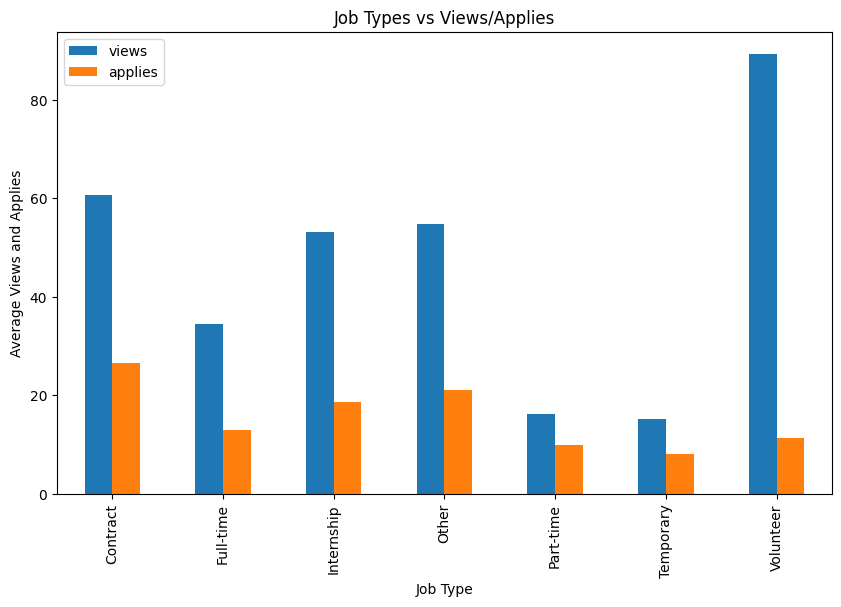

industry_name
Software Development                    56
Financial Services                      34
IT Services and IT Consulting           28
Higher Education                        17
Staffing and Recruiting                 11
Entertainment Providers                 11
Education                               11
Technology, Information and Internet    10
E-Learning Providers                     9
Hospitals and Health Care                8
Name: count, dtype: int64


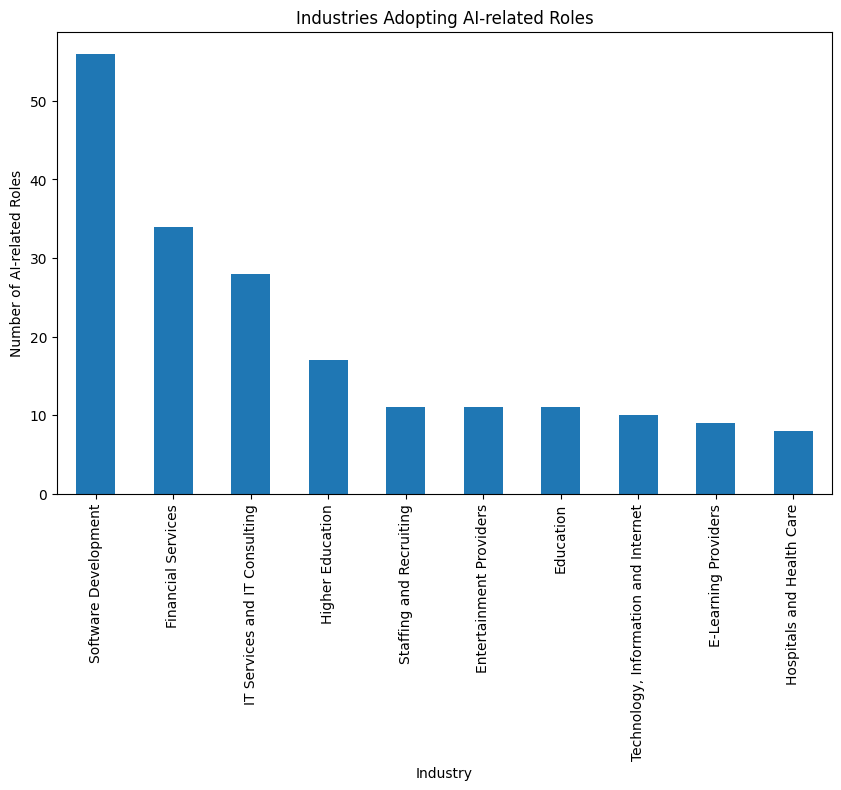

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `new_job_data` is your new_job_dataFrame
# Preprocessing to handle missing values and datetime conversion
new_job_data['original_listed_time'] = pd.to_datetime(new_job_data['original_listed_time'], errors='coerce')
new_job_data['listed_time'] = pd.to_datetime(new_job_data['listed_time'], errors='coerce')
new_job_data['closed_time'] = pd.to_datetime(new_job_data['closed_time'], errors='coerce')

# # 1. Salary and Automation
# # Analyze salary across experience levels
# salary_experience = new_job_data.groupby('formatted_experience_level')[['max_salary', 'min_salary', 'med_salary']].mean()
# print(salary_experience)

# salary_experience.plot(kind='bar', figsize=(10, 6))
# plt.title('Average Salaries by Experience Level')
# plt.xlabel('Experience Level')
# plt.ylabel('Salary')
# plt.show()

# # 2. Demand for Remote Work
# # Analyze remote work trends in AI-related roles
new_job_data['is_ai_role'] = new_job_data['title'].str.contains('AI\s|Machine Learning|Deep Learning', case=False, na=False)
# remote_ai = new_job_data[new_job_data['is_ai_role']].groupby('remote_allowed')['title'].count()
# print(remote_ai)

# remote_ai.plot(kind='bar', figsize=(8, 6))
# plt.title('Remote Allowed in AI-related Roles')
# plt.xlabel('Remote Allowed')
# plt.ylabel('Number of Jobs')
# plt.show()

# # 3. Skills Gap in the Age of AI
# # Analyze AI-related skills
# ai_skills = new_job_data['skills_desc'].str.contains('AI|ML|Machine Learning|Deep Learning', case=False, na=False)
# ai_skill_count = new_job_data[ai_skills]['skills_desc'].value_counts()
# print(ai_skill_count.head(10))

# 4. Job Types and Automation Risk
# Compare job types in relation to views and applies
job_type_views = new_job_data.groupby('formatted_work_type')[['views', 'applies']].mean()
print(job_type_views)

job_type_views.plot(kind='bar', figsize=(10, 6))
plt.title('Job Types vs Views/Applies')
plt.xlabel('Job Type')
plt.ylabel('Average Views and Applies')
plt.show()

# # 5. Sponsored Job Listings and Automation
# # Compare sponsored vs non-sponsored jobs
# sponsored = new_job_data.groupby('sponsored')['title'].count()
# print(sponsored)

# sponsored.plot(kind='bar', figsize=(8, 6))
# plt.title('Sponsored vs Non-Sponsored Job Listings')
# plt.xlabel('Sponsored')
# plt.ylabel('Number of Jobs')
# plt.show()

# # 6. Geographical Impact
# # Analyze job distribution by location for AI roles
# location_ai = new_job_data[new_job_data['is_ai_role']]['location'].value_counts()
# print(location_ai.head(10))

# location_ai.head(10).plot(kind='bar', figsize=(10, 6))
# plt.title('Top Locations for AI-related Jobs')
# plt.xlabel('Location')
# plt.ylabel('Number of Jobs')
# plt.show()

# # 7. Job Longevity and AI Impact
# # Analyze job posting duration
# new_job_data['posting_duration'] = (new_job_data['closed_time'] - new_job_data['listed_time']).dt.days
# job_longevity = new_job_data.groupby('is_ai_role')['posting_duration'].mean()
# print(job_longevity)

# job_longevity.plot(kind='bar', figsize=(8, 6))
# plt.title('Job Longevity: AI vs Non-AI Roles')
# plt.xlabel('AI Role')
# plt.ylabel('Average Posting Duration (days)')
# plt.show()

# # 8. Compensation Trends and AI/Automation
# # Compare compensation type for AI-related roles
# compensation_ai = new_job_data[new_job_data['is_ai_role']].groupby('compensation_type')[['max_salary', 'min_salary', 'med_salary']].mean()
# print(compensation_ai)

# compensation_ai.plot(kind='bar', figsize=(10, 6))
# plt.title('Compensation Type in AI-related Roles')
# plt.xlabel('Compensation Type')
# plt.ylabel('Average Salary')
# plt.show()

# 9. Industry-Specific Demand for AI
# Analyze industries adopting AI
industry_ai = new_job_data[new_job_data['is_ai_role']]['industry_name'].value_counts()
print(industry_ai.head(10))

industry_ai.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Industries Adopting AI-related Roles')
plt.xlabel('Industry')
plt.ylabel('Number of AI-related Roles')
plt.show()

# # 10. Trend Analysis Over Time
# # Analyze AI-related job postings over time
# new_job_data['year_posted'] = new_job_data['original_listed_time'].dt.year
# trend_ai = new_job_data[new_job_data['is_ai_role']].groupby('year_posted')['title'].count()
# print(trend_ai)

# trend_ai.plot(kind='line', figsize=(10, 6))
# plt.title('Trend of AI-related Job Postings Over Time')
# plt.xlabel('Year')
# plt.ylabel('Number of AI-related Job Postings')
# plt.show()


In [53]:
import pandas as pd

# Assuming `new_job_data` is your DataFrame

# Group by industry_name and task_type to count jobs
industry_job_counts = new_job_data.groupby(['industry_name', 'task_type']).size().reset_index(name='job_count')

# Pivot to separate counts of repetitive and non-repetitive jobs
industry_pivot = industry_job_counts.pivot(index='industry_name', columns='task_type', values='job_count').fillna(0)

# Rename columns for clarity
industry_pivot.columns = ['non_repetitive_jobs', 'repetitive_jobs']

# Add total jobs and ratio of repetitive jobs
industry_pivot['total_jobs'] = industry_pivot['non_repetitive_jobs'] + industry_pivot['repetitive_jobs']
industry_pivot['repetitive_ratio'] = industry_pivot['repetitive_jobs'] / industry_pivot['total_jobs']

# Sort by the repetitive ratio
industry_pivot = industry_pivot.sort_values(by='repetitive_ratio', ascending=False)

# Reset the index for better readability
industry_pivot.reset_index(inplace=True)

industry_pivot.sort_values(by='total_jobs' ,ascending=False).head(20)


,industry_name,non_repetitive_jobs,repetitive_jobs,total_jobs,repetitive_ratio
310,Hospitals and Health Care,7390.0,1236.0,8626.0,0.143288
293,Staffing and Recruiting,1733.0,3927.0,5660.0,0.693816
286,Retail,687.0,3937.0,4624.0,0.851427
236,Financial Services,3.0,2122.0,2125.0,0.998588
239,Restaurants,5.0,1984.0,1989.0,0.997486
249,Software Development,15.0,1932.0,1947.0,0.992296
266,IT Services and IT Consulting,66.0,1757.0,1823.0,0.963796
100,Telecommunications,0.0,1456.0,1456.0,1.000000
307,Medical Practices,888.0,251.0,1139.0,0.220369
256,Internet Publishing,17.0,1025.0,1042.0,0.983685


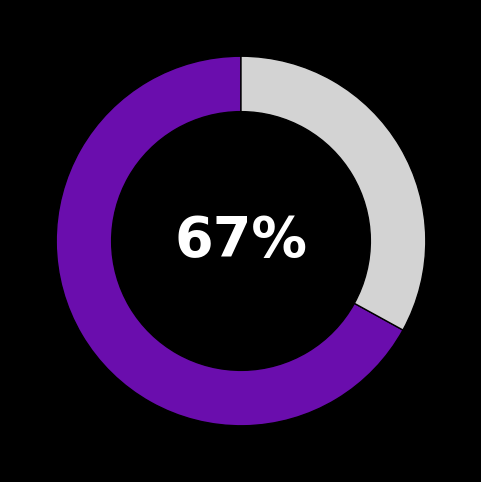

In [62]:
import matplotlib.pyplot as plt

# Value to display
value = 67  # Adjust this value as needed

# Gauge configuration
size = 0.3
colors = ["#6a0dad", "lightgrey"]  # Purple for the filled part, grey for the empty part

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6), facecolor='black')

# Plot the gauge
ax.pie(
    [value, 100 - value], 
    radius=1, 
    colors=colors, 
    wedgeprops=dict(width=size, edgecolor='black'), 
    startangle=90
)

# Add the value as text
ax.text(
    0, 0, f"{value}%", 
    ha='center', va='center', fontsize=40, color='white', weight='bold'
)

# Set the background color and remove axes
ax.set_facecolor("black")
plt.axis("off")

# Show the plot
plt.show()
